<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

## Deliverable 📬

To complete this project, your team should: 

- Create some visualizations
- Train at least one **linear regression model** on the dataset, that predicts the amount of weekly sales as a function of the other variables
- Assess the performances of the model by using a metric that is relevant for regression problems
- Interpret the coefficients of the model to identify what features are important for the prediction
- Train at least one model with **regularization (Lasso or Ridge)** to reduce overfitting

In [1]:
!pip install plotly==4.9.0 -q

In [2]:
import pandas as pd
import numpy as np

import datetime
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
    )
pio.templates.default = "jedha"
pio.renderers.default = "iframe" 

In [3]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



# Part 1 : EDA and data preprocessing

In [4]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07-01-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

 **Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. One can see above that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.

In [5]:
# drop rows with Weekly_Sales (The target) missings
dataset = dataset[dataset['Weekly_Sales'].notna()]
print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,136.000000,118,1.360000e+02,125.000000,121.000000,124.000000,125.000000,122.000000
unique,NaN,79,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,30-07-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,10.014706,NaN,1.249536e+06,0.072000,60.853967,3.316992,178.091144,7.665582
std,6.124614,NaN,6.474630e+05,0.259528,18.514432,0.479540,40.243105,1.619428
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.220000,2.838500,131.637000,6.690000
50%,10.000000,NaN,1.261424e+06,0.000000,62.250000,3.451000,196.919506,7.477000
75%,15.250000,NaN,1.806386e+06,0.000000,75.950000,3.724000,214.878556,8.150000


**Create usable features from the *Date* column :**
The *Date* column cannot be included as it is in the model. Either you can drop this column, or you will create new columns that contain the following numeric features : 
- *year*
- *month*
- *day*
- *day of week*

In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['Day'] = pd.DatetimeIndex(dataset['Date']).day
dataset['Day_of_week'] = dataset['Date'].dt.day_name()
dataset['Weekday_number'] = dataset['Date'].dt.weekday
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week,Weekday_number
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,Friday,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,Friday,4.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,Friday,4.0
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,Friday,4.0


## Visuals

In [7]:
# Univariate analysis
from plotly.subplots import make_subplots

# Barplot of each qualitative variable
cat_features = ['Store', 'Holiday_Flag']
fig2 = make_subplots(rows = len(cat_features), cols = 1, subplot_titles = cat_features)
for i in range(len(cat_features)):
    
    x_coords = dataset[cat_features[i]].value_counts().index.tolist()
    y_coords = dataset[cat_features[i]].value_counts().tolist()
    
    fig2.add_trace(
        go.Bar(
            x = x_coords,
            y = y_coords),
        row = i + 1,
        col = 1)
fig2.update_layout(
        title = go.layout.Title(text = "Barplot of qualitative variables", x = 0.5), showlegend = False, 
            autosize=False, height=500)
fig2.show()

In [8]:
# Let's see how our target look like
fig = px.histogram(dataset['Weekly_Sales'], nbins = 120, title = "Distribution of target variable")
fig.show()

We can see that the distribution of the sales is not regular, we will try understand this effect by anylising the impact of multiple factors on sales.

In [9]:
px.scatter(dataset, x = 'Temperature', y = 'Weekly_Sales')

We cannot see linear impact of temperatures on sales

In [10]:
px.scatter(dataset, x = 'Fuel_Price', y = 'Weekly_Sales')

There's also no linear impact of the fuel price on sales

In [11]:
px.scatter(dataset, x = 'CPI', y = 'Weekly_Sales')

Also no linear impact of the CPI on sales

In [12]:
px.scatter(dataset, x = 'Unemployment', y = 'Weekly_Sales')

no linear impact also of th unemployment on sales; we can observe 5 outliers (near the value 14)

In [13]:
px.box(dataset, x="Store",y="Weekly_Sales")

Here we can observe that the store has a direct impact on sales, the stores have specifics windows of sales.

In [14]:
px.scatter(dataset, x = 'Holiday_Flag', y = 'Weekly_Sales')

The holiday flag as also no direct impact on sales and is very imbalanced

In [15]:
px.scatter(dataset, x = 'Date', y = 'Weekly_Sales')

the date as also no linear impact on sales

In [16]:
px.box(dataset, x="Month",y = 'Weekly_Sales')

We can see that there is some impact of the month on sales, particularly, april and september have lower sales than the other months, and october have more higher sales.

In [17]:
px.scatter(dataset, x = 'Day', y = 'Weekly_Sales')

the day of the week has also no linear impact on sales

In [18]:
px.scatter(dataset, x = 'Day_of_week', y = 'Weekly_Sales')

the day of the week has some impact on sales, for exemple on mondays the sales are lower, but the number of observations is very low. Most of them are on friday.

**As we have seen, except for the store number, we cannot observe any linear correlation between each variable and the target**

<AxesSubplot:>

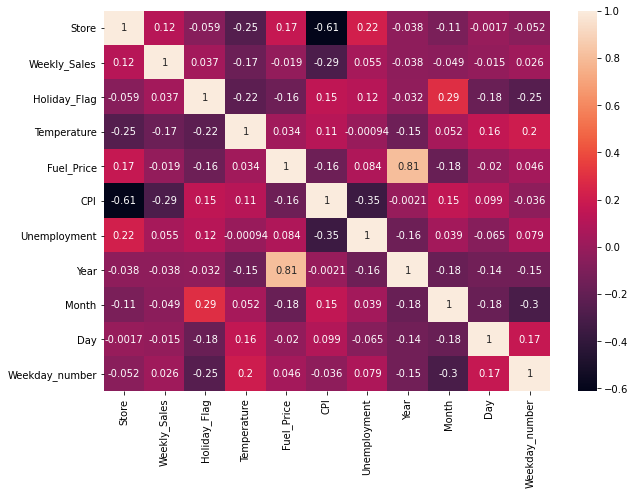

In [19]:
# heat map to check for correlation between the features (for exemple year and fuel price is highly correlated)
plt.figure(figsize= (10,7))
sns.heatmap(dataset.corr(), annot= True)

**Droping lines containing invalid values or outliers :**
In this project, will be considered as outliers all the numeric features that don't fall within the interquartile +- 1.5 interquartile range. This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*

In [20]:
df = dataset[["Temperature","Fuel_Price","CPI","Unemployment"]]
desc = df.describe()
numeric_columns = desc.columns
mask = True
for col in numeric_columns:
    q1 = desc.loc["25%", col]
    q3 = desc.loc["75%", col]
    ecart = q3 - q1
    cond1 = q1 - 1.5*ecart < dataset[col]
    cond2 = q3 + 1.5*ecart > dataset[col]
    mask = mask & cond1 & cond2
dataset= dataset.loc[mask,:]
dataset.describe(include="all")

<ipython-input-20-dd1a1abc9aec>:13: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week,Weekday_number
count,90.000000,80,9.000000e+01,80.000000,90.00000,90.000000,90.000000,90.000000,80.000000,80.000000,80.000000,80,80.000000
unique,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,2010-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.900000,NaN,1.233865e+06,0.075000,61.06100,3.318444,179.524905,7.389733,2010.887500,6.525000,15.962500,NaN,3.650000
std,6.204475,NaN,6.647250e+05,0.265053,17.74604,0.484399,39.554303,0.982729,0.826672,3.329861,8.594145,NaN,1.388014
min,1.000000,NaN,2.689290e+05,0.000000,18.79000,2.548000,126.128355,5.143000,2010.000000,1.000000,1.000000,NaN,0.000000
25%,4.000000,NaN,5.617240e+05,0.000000,45.34250,2.814750,132.602339,6.642250,2010.000000,4.000000,8.000000,NaN,4.000000


As we can observe, the number of observations is now 90, and 80 if we include the dates columns. The date issue is not very relevant in our problematic, most of the sales as we have seen are registered on friday and the ones on monday are less, this more of an accountant problem. So we decided to keep the maximum information so we will drop the holiday flag and dates columns

**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*

In [21]:
X = dataset[["Store","Temperature","Fuel_Price","CPI","Unemployment"]]
y = dataset["Weekly_Sales"]

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment

In [22]:
X["Store"] = X["Store"].astype(str)

<ipython-input-22-10f30e3fb7a3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']  at positions  [1, 2, 3, 4]
Found categorical features  ['Store']  at positions  [0]


### Part 2 : model: linear regression

In [24]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [25]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

Convert pandas DataFrames to numpy arrays...
...Done


In [26]:
# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:2,:])

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:2,:])

Encoding categorical features and standardizing numerical features...

[['16.0' 61.79 2.7110000000000003 189.5231276 6.867999999999999]
 ['5.0' 69.17 3.594 224.0192873 5.4220000000000015]]
...Done
  (0, 5)	1.0
  (0, 18)	0.042603619566292404
  (0, 19)	-1.2684064129831014
  (0, 20)	0.20507787897090277
  (0, 21)	-0.5553454246885398
  (1, 13)	1.0
  (1, 18)	0.45927689938857913
  (1, 19)	0.5805882929947872
  (1, 20)	1.092603852656994
  (1, 21)	-2.1273444147693765


In [27]:
# Training the model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [28]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[0])
print()

Predictions on training set...
...Done.
587910.7992543326



In [29]:
# Encoding categorical features and standardizing numerical features for X_test
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:2,:])
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:2,:])

Encoding categorical features and standardizing numerical features...

[['6.0' 78.89 2.759 212.412888 7.0920000000000005]
 ['7.0' 38.26 2.725 189.7048215 8.963]]
...Done
  (0, 14)	1.0
  (0, 18)	1.008066097203298
  (0, 19)	-1.1678948094871355
  (0, 20)	0.7939914584280194
  (0, 21)	-0.3118269089360434
  (1, 15)	1.0
  (1, 18)	-1.2858953335798327
  (1, 19)	-1.2390905286301115
  (1, 20)	0.2097525458588324
  (1, 21)	1.722204979335912


In [30]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[0])
print()

Predictions on test set...
...Done.
1599502.6110590599



In [31]:
# Print R2 scores of the linear regression
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9820292636903609
R2 score on test set :  0.9345198599151234


   We can see that the linear regression model has a good R2 with some overfitting

In [32]:
# Print Mean Squared Error of the linear regression
print("MSE on training set : ", mean_squared_error(Y_train, Y_train_pred))
print("MSE on test set : ", mean_squared_error(Y_test, Y_test_pred))

MSE on training set :  7512289079.966899
MSE on test set :  33020511275.70996


In [33]:
# Print Mean Absolute Error of the linear regression
print("MAE on training set : ", mean_absolute_error(Y_train, Y_train_pred))
print("MAE on test set : ", mean_absolute_error(Y_test, Y_test_pred))

MAE on training set :  65018.26408242526
MAE on test set :  108358.13319577303


Considering that that the weekly sales are include in the range [268 000 - 2 770 000]; the results are not so bad to make prevision of sales for Wallmart, and they are quite stable if not exactly precise.

In [34]:
(cross_val_score(regressor, X, y, cv=10,scoring=make_scorer(mean_absolute_error)))

array([634765.41650738, 528728.36676556, 668954.32469738, 594130.85937939,
       597460.34531032, 650584.69299769, 695360.0299987 , 521527.92800343,
       528290.97132294, 563827.00562279])

In [35]:
#The different coefficients
print(X_train[0])
print(regressor.coef_)

  (0, 5)	1.0
  (0, 18)	0.042603619566292404
  (0, 19)	-1.2684064129831014
  (0, 20)	0.20507787897090277
  (0, 21)	-0.5553454246885398
[ 2.20150896e+06  1.29914916e+05  2.49980797e+06  1.12495383e+06
  9.90304580e+05 -4.22745579e+05  1.33407752e+06  1.36169964e+06
  1.70423614e+06  2.88459920e+05  6.25691384e+05 -1.23581781e+06
  2.65528456e+06 -1.20601819e+06  6.06651265e+04 -5.55968750e+05
 -6.64233872e+05 -1.07148272e+06  6.31985612e+02 -7.42635804e+04
  8.88754999e+05  4.77804016e+04]


Feature: 0, Score: 2201508.96319
Feature: 1, Score: 129914.91613
Feature: 2, Score: 2499807.96740
Feature: 3, Score: 1124953.83172
Feature: 4, Score: 990304.58016
Feature: 5, Score: -422745.57852
Feature: 6, Score: 1334077.52397
Feature: 7, Score: 1361699.64282
Feature: 8, Score: 1704236.13709
Feature: 9, Score: 288459.92043
Feature: 10, Score: 625691.38421
Feature: 11, Score: -1235817.81134
Feature: 12, Score: 2655284.56401
Feature: 13, Score: -1206018.19418
Feature: 14, Score: 60665.12648
Feature: 15, Score: -555968.75011
Feature: 16, Score: -664233.87232
Feature: 17, Score: -1071482.71967
Feature: 18, Score: 631.98561
Feature: 19, Score: -74263.58039
Feature: 20, Score: 888754.99861
Feature: 21, Score: 47780.40155


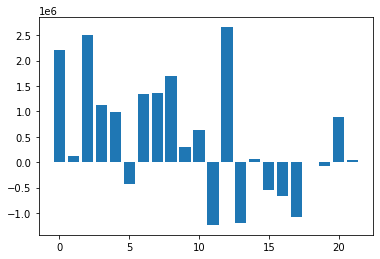

In [36]:
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### the first 18 coef are the one hot encoded version of the 19 stores
#### the 4 last coef are :
    Temperature: 631, temperature has almost no impact
    Fuel_Price: -74263, the fuel a small negativ value 
    CPI: 888754, Consumer Price Index has a high positiv value
    Unemployment: 47780, strangely has little impact but positive

### Part 3 : Fight overfitting
In this last part, we'll train a **regularized linear regression model**. with cross validation and parmeters optimization 

#### Lasso - Linear Model trained with L1 prior as regularizer 

In [37]:
# creating a lasso model with search on parameters and cross validation
parameters = {'alpha':np.logspace(-4, 1, num=5)}
model = Lasso()
grid_lasso = GridSearchCV(model,param_grid=parameters, cv=10)

In [38]:
# Training the model
print("Train model...")
grid_lasso.fit(X_train, Y_train)
print("...Done.")

Train model...


/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 252606635408.14026, tolerance: 2753579552.6303916

/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 220467680064.95493, tolerance: 2736957672.9191413

/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 239959695671.04007, tolerance: 2680034325.4036393

/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iteratio

...Done.


/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 164850787420.5777, tolerance: 2539992238.6292167

/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 145220236632.4193, tolerance: 2700133344.8244476

/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 150182176962.74768, tolerance: 2740692723.8352127

/Users/jd/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations

In [39]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = grid_lasso.predict(X_train)
print("...Done.")
print(Y_train_pred[0])
print()

Predictions on training set...
...Done.
579416.7884714471



In [40]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = grid_lasso.predict(X_test)
print("...Done.")
print(Y_test_pred[0])
print()

Predictions on test set...
...Done.
1597513.061826396



In [41]:
# Print R2 scores of the lasso regression
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9818548353098375
R2 score on test set :  0.9367466647298217


In [42]:
# Print Mean Squared Error of the lasso regression
print("MSE on training set : ", mean_squared_error(Y_train, Y_train_pred))
print("MSE on test set : ", mean_squared_error(Y_test, Y_test_pred))

MSE on training set :  7585205202.916175
MSE on test set :  31897571810.442497


In [43]:
# Print Mean Absolute Error of the linear regression
print("MAE on training set : ", mean_absolute_error(Y_train, Y_train_pred))
print("MAE on test set : ", mean_absolute_error(Y_test, Y_test_pred))

MAE on training set :  64058.68033607296
MAE on test set :  107469.77942464917


#### Ridge

In [44]:
# Instantiation of the ridge model, Linear least squares with l2 regularization.
ridge = Ridge()
# Larger values of alpha specify stronger regularization
grid_params = {'alpha': [0.0, 0.00000001, 0.000001, 0.0001, 0.1, 1.0, 10.0, 100.0, 1000.0] }
gridridge = GridSearchCV(ridge, param_grid = grid_params, cv = 10)
gridridge.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.0, 1e-08, 1e-06, 0.0001, 0.1, 1.0, 10.0,
                                   100.0, 1000.0]})

In [46]:
gridridge.best_params_

{'alpha': 1e-06}

In [47]:
best_ridge = gridridge.best_estimator_

In [48]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = best_ridge.predict(X_train)
print("...Done.")
print(Y_train_pred[0])
print()

Predictions on training set...
...Done.
587913.393757299



In [49]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = best_ridge.predict(X_test)
print("...Done.")
print(Y_test_pred[0])
print()

Predictions on test set...
...Done.
1598936.7849598501



In [50]:
# Print R2 scores of the linear regression
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9820291812117189
R2 score on test set :  0.934575523668323


In [51]:
# Print Mean Absolute Error of the linear regression
print("MAE on training set : ", mean_absolute_error(Y_train, Y_train_pred))
print("MAE on test set : ", mean_absolute_error(Y_test, Y_test_pred))

MAE on training set :  65014.902636810235
MAE on test set :  108345.42201984936


#### LASSO and Ridge regressions perform better with higher dimensional data.
This can explain why we haven't seen improvements compare to the simple linear regression model.